In [1]:
print("Crutch to fix VSCode - product of small and poor company that cannot make Jupyter notebook run from first cell on first run, it runs from second on first launch and then runs from first (if using run all button)")

Crutch to fix VSCode - product of small and poor company that cannot make Jupyter notebook run from first cell on first run, it runs from second on first launch and then runs from first (if using run all button)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import solvers
import plotters

%matplotlib inline

In [3]:
print_progress = True
plot_single = True

# Лабораторная работа 2 Системы ОДУ (жёсткий вариант)

$$
\begin{cases}
    \dot{y}_1 = 77.27 (y_2 + y_1 (1 - 8.375 \cdot 10^{-6} y_1 - y_2)) \\
    \dot{y}_2 = \frac{1}{77.27} (y_3 - (1 + y_1) y_2) \\
    \dot{y}_3 = 0.161 (y_1 - y_3)
\end{cases}
$$

In [4]:
def f(t, x):
    return np.array([
        77.27 * (x[1] + x[0] * (1 - 8.375e-6 * x[0] - x[1])),
        1 / 77.27 * (x[2] - (1 + x[0]) * x[1]),
        0.161 * (x[0] - x[2])
    ])

t_start = 0
t_stop = 800
x_0 = np.array([0.5, 0.5, 0.5])

## Методы Рунге-Кутта

0.005
tau: 0.00009029, t: 19.28712805, len: 0000470247, 14.00264359

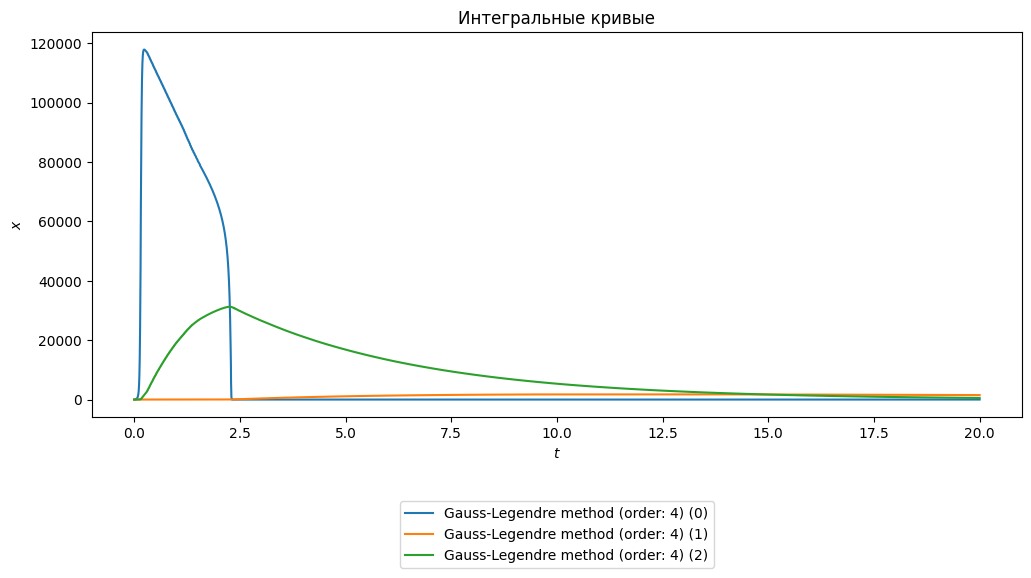

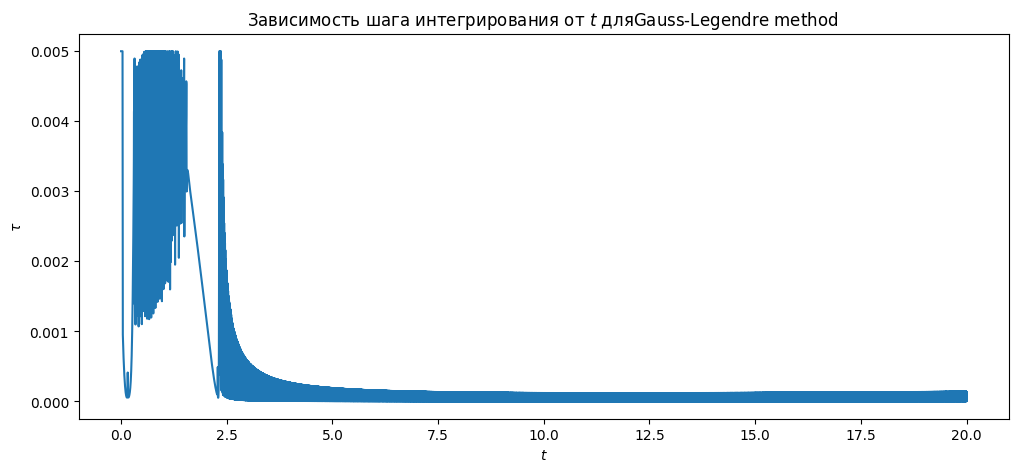

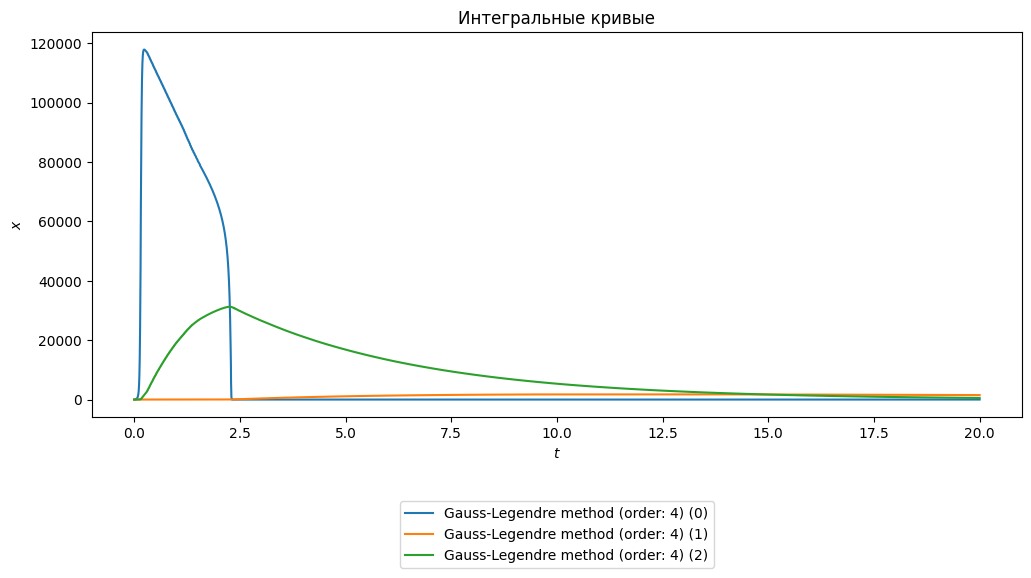

In [ ]:
enabled = True
# semi_verbose = True
import time

# t_stop = 20
t_stop = 800
tau = 0.00001


methods: list[solvers.RungeKuttaMethod] = []

# methods.append(
#     solvers.RungeKuttaMethod(
#         "Classic fourth-order method",
#         4,
#         solvers.ButcherTable(
#             [
#                 [0.0, 0.0, 0.0, 0.0, 0.0],
#                 [1/2, 1/2, 0.0, 0.0, 0.0],
#                 [1/2, 0.0, 1/2, 0.0, 0.0],
#                 [1.0, 0.0, 0.0, 1.0, 0.0],
#                 [0.0, 1/6, 1/3, 1/3, 1/6],
#             ]
#         ),
#         step=0.00001,
#     )
# )

# methods.append(
#     solvers.RungeKuttaMethod(
#         "Backward Euler method",
#         1,
#         solvers.ButcherTable(
#             [
#                 [1.0, 1.0],
#                 [0.0, 1.0],
#             ]
#         ),
#         step=0.00001,
#     )
# )

# methods.append(
#     solvers.RungeKuttaMethod(
#         "Lobatto IIIC 4 order method",
#         4,
#         solvers.ButcherTable(
#             [
#                 [0.0,  1/6, -1/3,   1/6],
#                 [1/2,  1/6, 5/12, -1/12],
#                 [1.0,  1/6,  2/3,   1/6],
#                 [0.0, -1/2,  2.0,  -1/2],
#                 [0.0,  1/6,  2/3,   1/6],
#             ]
#         ),
#         step=0.0005
#     )
# )

methods.append(
    solvers.RungeKuttaMethod(
        "Gauss-Legendre method",
        4,
        solvers.ButcherTable(
            [
                [1 / 2 - np.sqrt(3) / 6, 1 / 4                 , 1 / 4 - np.sqrt(3) / 6],
                [1 / 2 + np.sqrt(3) / 6, 1 / 4 + np.sqrt(3) / 6, 1 / 4                 ],
                [0                     , 1 / 2 + np.sqrt(3) / 2, 1 / 2 - np.sqrt(3) / 2],
                [0                     , 1 / 2                 , 1 / 2                 ],
            ]
        ),
        step=0.005
    )
)

last_output = time.time()

if enabled:
    for method in methods:
        tau = method.step or tau
        print(tau)
        method = solvers.solve_runge_kutta(f, t_start, t_stop, tau, x_0, method, print_progress=print_progress, include_every_n=1)
        if plot_single:
            plotters.plot_solutions([method], multidimensionals_solution=True)
        
        if method.table.adaptive:
            plotters.plot_tau(method)

    plotters.plot_solutions(methods, multidimensionals_solution=True)

## Явный метод Рунге-Кутта
Работает очень долго из-за малого шага (порядка нескольких часов при $t_{stop}=800$)

1e-05
t: 19.80877000, len: 0001980878, 50.00681543

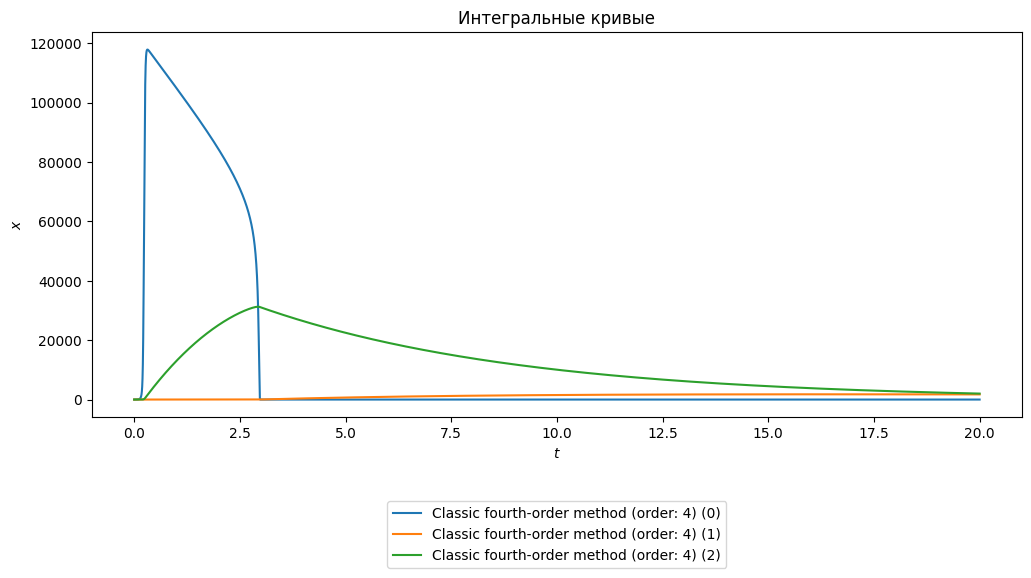

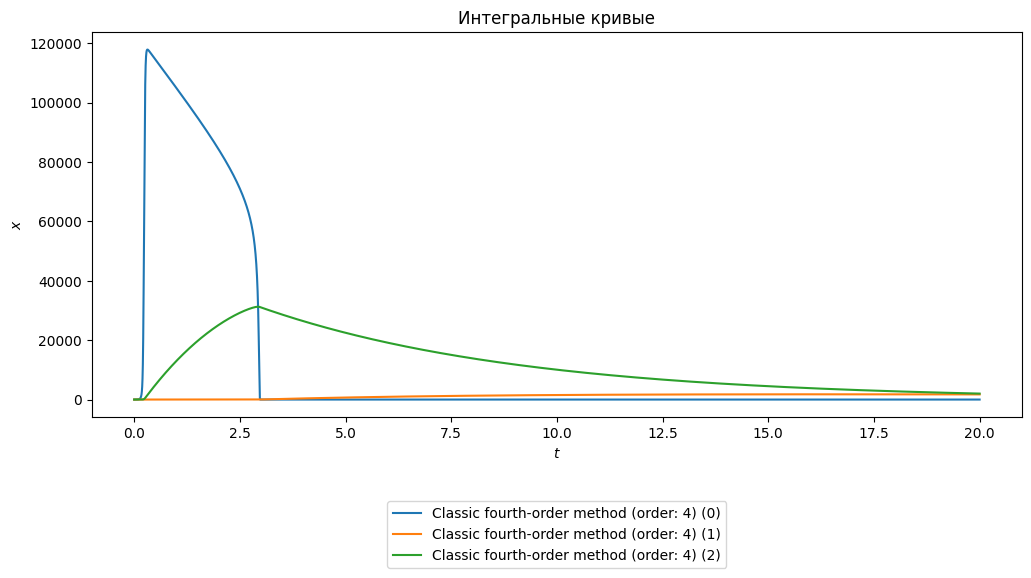

In [8]:
enabled = True
import time

t_stop = 20
tau = 0.00001


methods: list[solvers.RungeKuttaMethod] = []

methods.append(
    solvers.RungeKuttaMethod(
        "Classic fourth-order method",
        4,
        solvers.ButcherTable(
            [
                [0.0, 0.0, 0.0, 0.0, 0.0],
                [1/2, 1/2, 0.0, 0.0, 0.0],
                [1/2, 0.0, 1/2, 0.0, 0.0],
                [1.0, 0.0, 0.0, 1.0, 0.0],
                [0.0, 1/6, 1/3, 1/3, 1/6],
            ]
        ),
        step=0.00001,
    )
)

# methods.append(
#     solvers.RungeKuttaMethod(
#         "Backward Euler method",
#         1,
#         solvers.ButcherTable(
#             [
#                 [1.0, 1.0],
#                 [0.0, 1.0],
#             ]
#         ),
#         step=0.00001,
#     )
# )

# methods.append(
#     solvers.RungeKuttaMethod(
#         "Lobatto IIIC 4 order method",
#         4,
#         solvers.ButcherTable(
#             [
#                 [0.0,  1/6, -1/3,   1/6],
#                 [1/2,  1/6, 5/12, -1/12],
#                 [1.0,  1/6,  2/3,   1/6],
#                 [0.0, -1/2,  2.0,  -1/2],
#                 [0.0,  1/6,  2/3,   1/6],
#             ]
#         ),
#         step=0.0005
#     )
# )

# methods.append(
#     solvers.RungeKuttaMethod(
#         "Gauss-Legendre method",
#         4,
#         solvers.ButcherTable(
#             [
#                 [1 / 2 - np.sqrt(3) / 6, 1 / 4                 , 1 / 4 - np.sqrt(3) / 6],
#                 [1 / 2 + np.sqrt(3) / 6, 1 / 4 + np.sqrt(3) / 6, 1 / 4                 ],
#                 [0                     , 1 / 2 + np.sqrt(3) / 2, 1 / 2 - np.sqrt(3) / 2],
#                 [0                     , 1 / 2                 , 1 / 2                 ],
#             ]
#         ),
#         step=0.005
#     )
# )

last_output = time.time()

if enabled:
    for method in methods:
        tau = method.step or tau
        print(tau)
        method = solvers.solve_runge_kutta(f, t_start, t_stop, tau, x_0, method, print_progress=print_progress, include_every_n=1)
        if plot_single:
            plotters.plot_solutions([method], multidimensionals_solution=True)
        
        if method.table.adaptive:
            plotters.plot_tau(method)

    plotters.plot_solutions(methods, multidimensionals_solution=True)

## Неявные метода дифференцирования назад

t: 794.16000000, len: 0000079418, 27.00928092

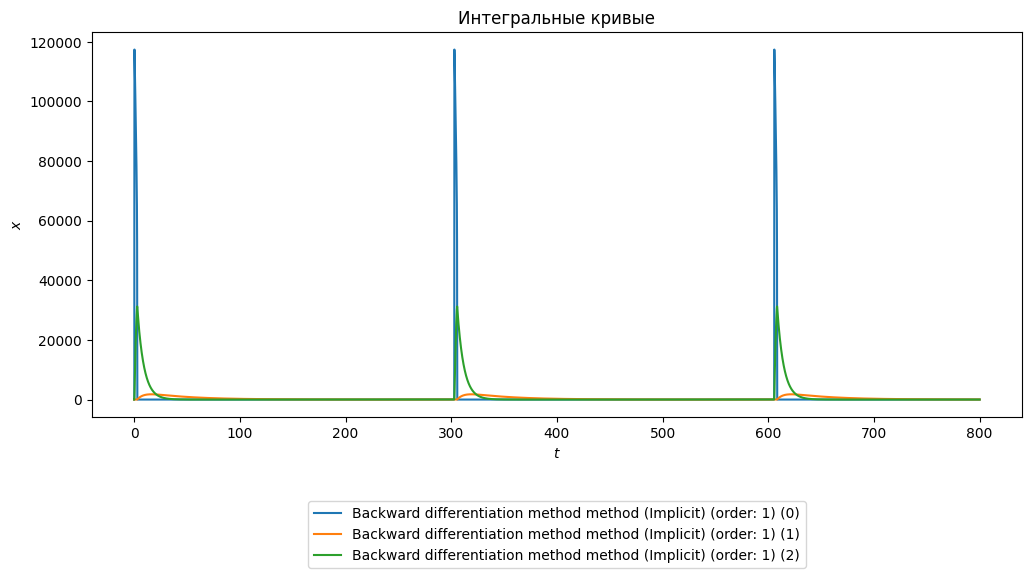

t: 799.45000000, len: 0000079947, 30.01284790

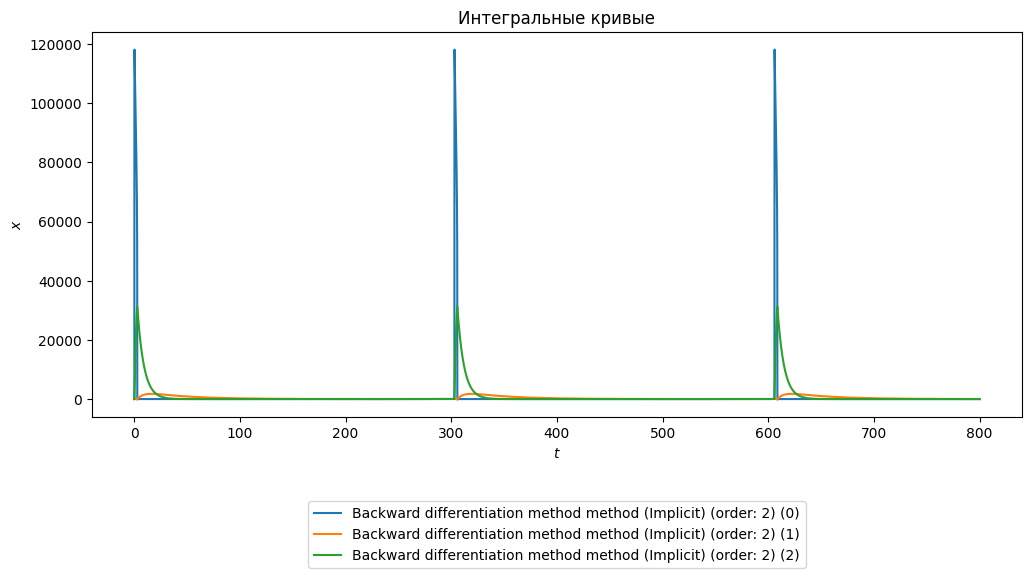

t: 786.94000000, len: 0000078696, 28.01019955

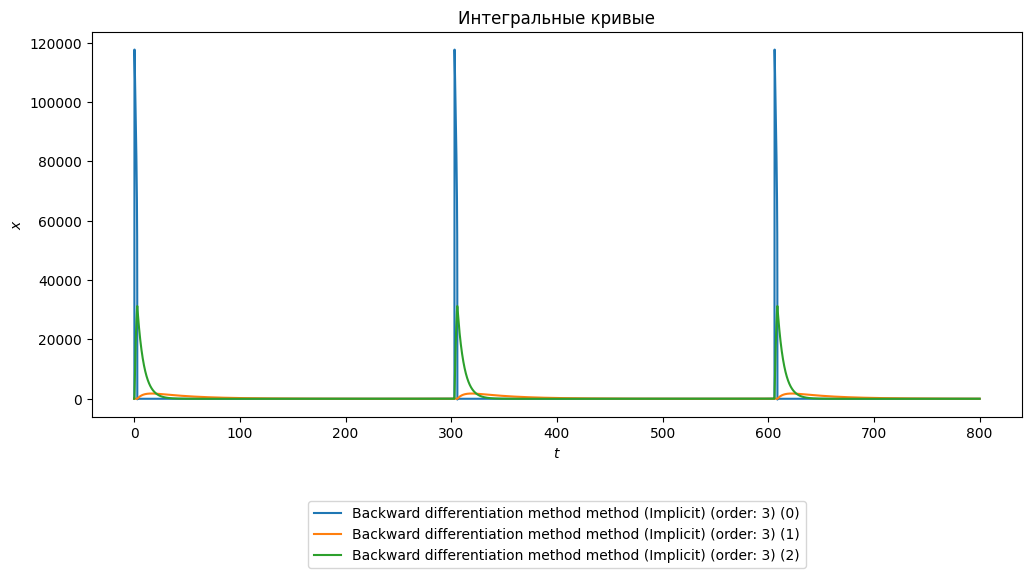

t: 793.06000000, len: 0000079308, 35.01504803

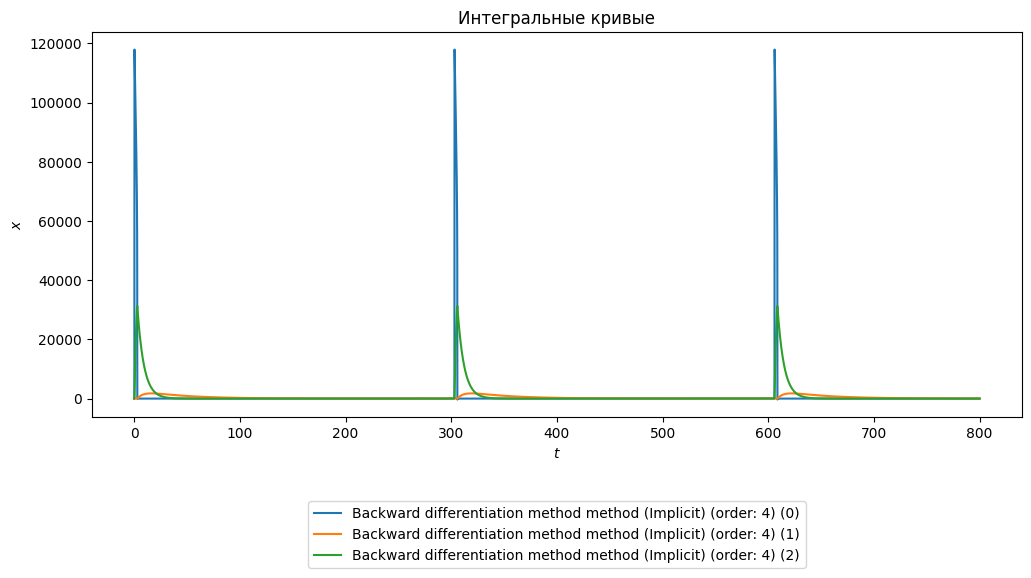

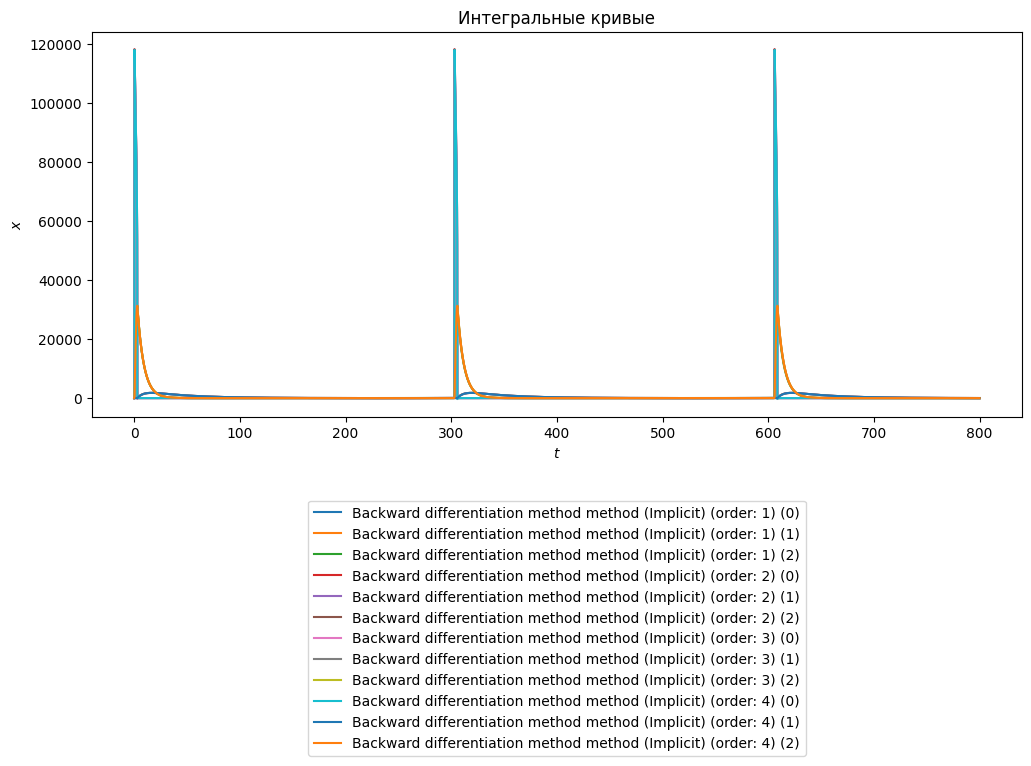

In [6]:
tau = 0.01
t_stop = 800

enabled = True

methods: list[solvers.BackwardDiffenetiationMethod] = []

methods.append(
    solvers.BackwardDiffenetiationMethod(
        1,
        "Implicit"
    )
)

methods.append(
    solvers.BackwardDiffenetiationMethod(
        2,
        "Implicit"
    )
)

methods.append(
    solvers.BackwardDiffenetiationMethod(
        3,
        "Implicit"
    )
)

methods.append(
    solvers.BackwardDiffenetiationMethod(
        4,
        "Implicit"
    )
)

if enabled:
    for method in methods:
        tau = method.step or tau
        method = solvers.solve_backward_differentiation(f, t_start, t_stop, tau, x_0, method, print_progress=print_progress, include_every_n=int(0.01 / tau))
        if plot_single:
            plotters.plot_solutions([method], multidimensionals_solution=True)

    plotters.plot_solutions(methods, multidimensionals_solution=True)

## Неявные методы Адамса

Методы Адамса высших порядков оказались нестабильными при различных шагах сетки

Adams method (Implicit) 1


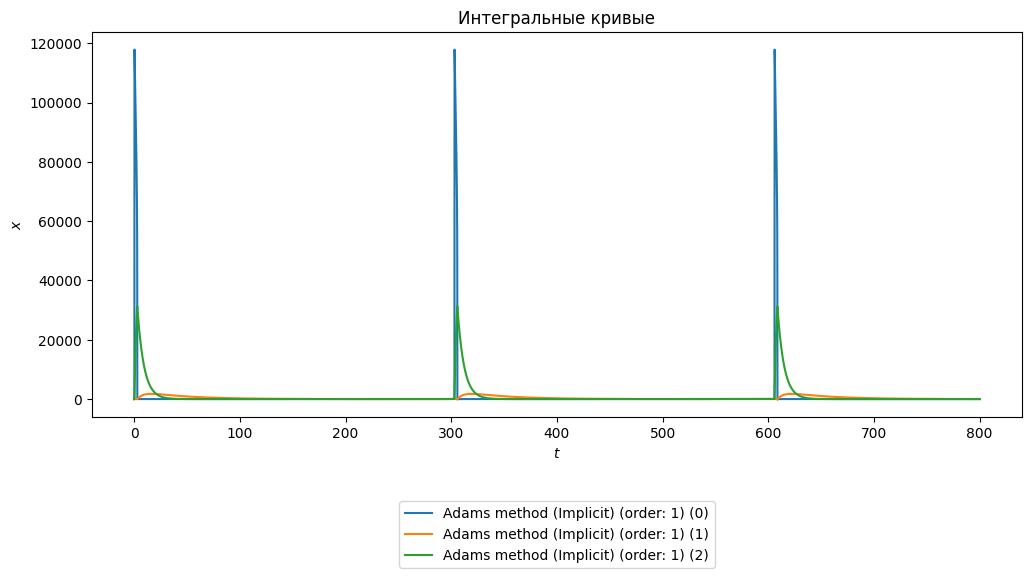

Adams method (Implicit) 2
Cannot solve system, too many iterations
Failed to solve at t = 0.58


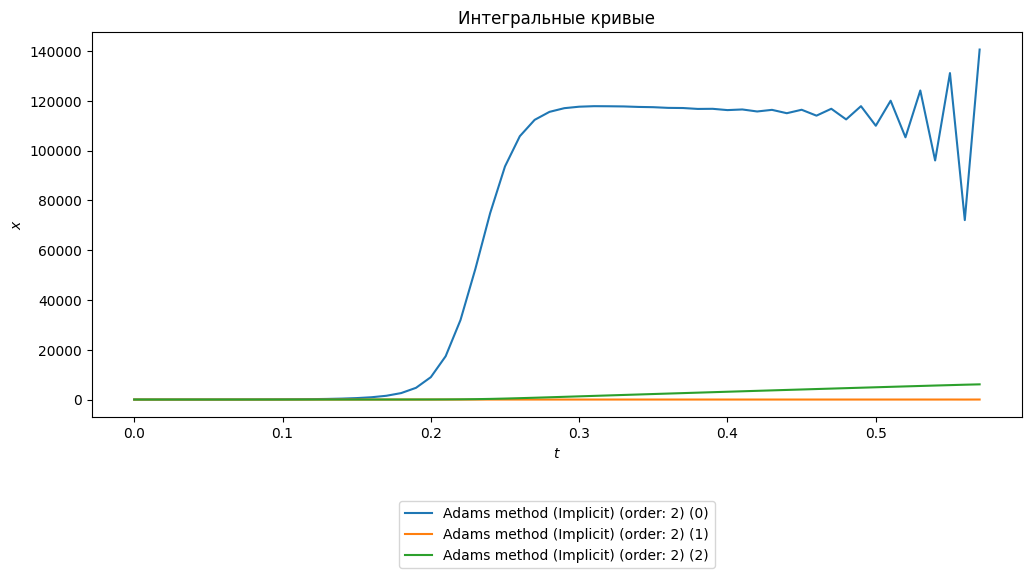

Adams method (Implicit) 3
Cannot solve system, too many iterations
Failed to solve at t = 0.42


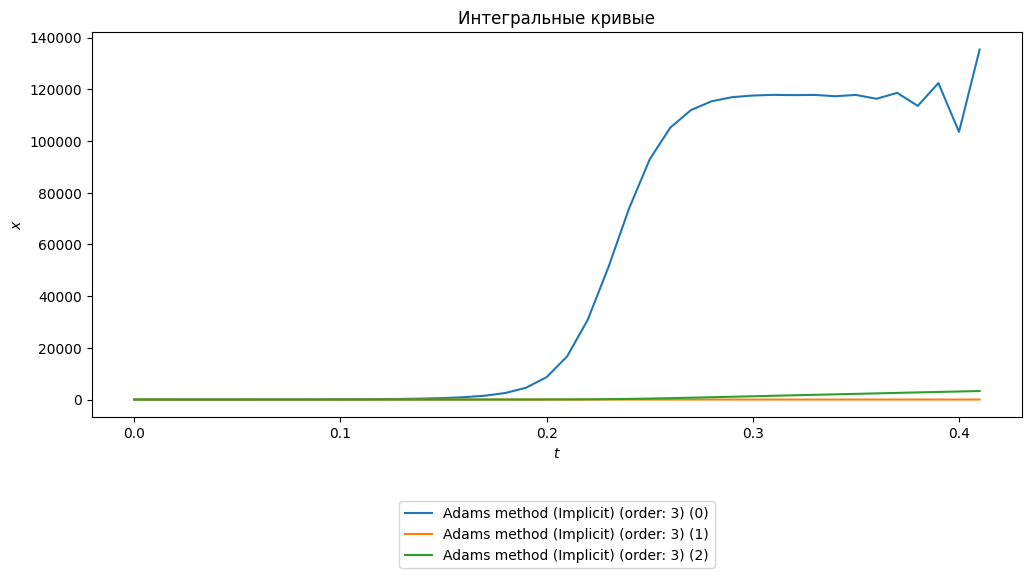

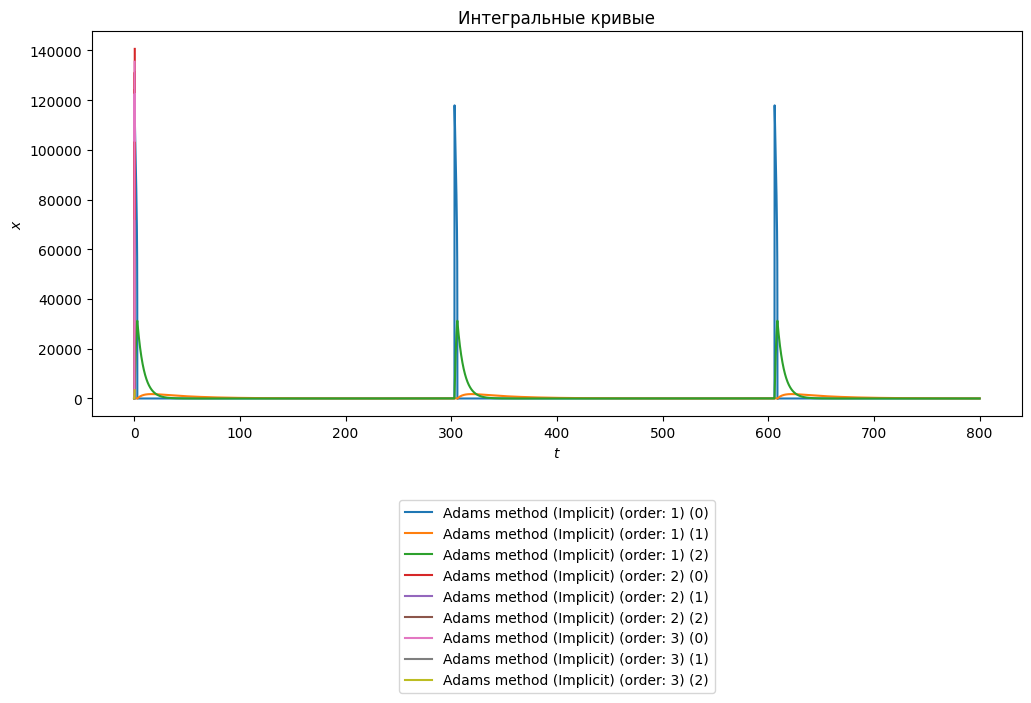

In [7]:
tau = 0.01
t_stop = 800

enabled = True

methods: list[solvers.AdamsMethod] = []

methods.append(
    solvers.AdamsMethod(
        1,
        "Implicit",
    )
)

methods.append(
    solvers.AdamsMethod(
        2,
        "Implicit",
    )
)

methods.append(
    solvers.AdamsMethod(
        3,
        "Implicit",
    )
)

if enabled:
    for method in methods:
        tau = method.step or tau
        method = solvers.solve_adams(f, t_start, t_stop, tau, x_0, method, print_progress=print_progress    , include_every_n=int(0.01 / tau))
        if plot_single:
            plotters.plot_solutions([method], multidimensionals_solution=True)

    plotters.plot_solutions(methods, multidimensionals_solution=True)

Nordesieck representation of implicit_adams method of order 1 1
[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 

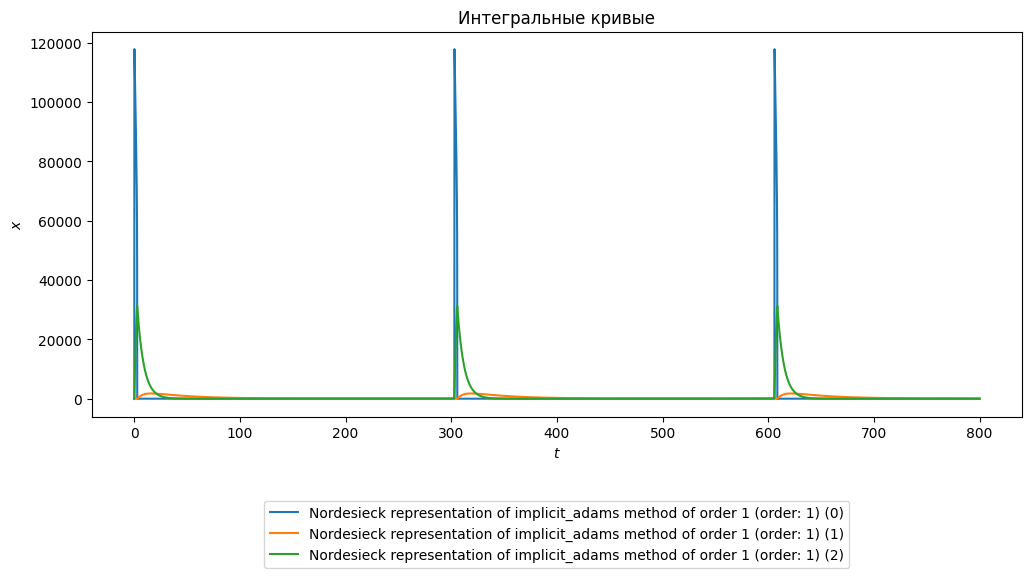

Nordesieck representation of implicit_adams method of order 2 2
Cannot solve system, got not a number value
Failed to solve at t = 0.01
[0]
[[0.5 0.5 0.5]]


/home/vlad/Documents/VSCode/MiptCompMath/solvers.py:31: RuntimeWarning: invalid value encountered in scalar divide
  L[j][i] = (A[j][i] - sum) / U[i][i]
/home/vlad/Documents/VSCode/MiptCompMath/solvers.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  L[j][i] = (A[j][i] - sum) / U[i][i]
/home/vlad/Documents/VSCode/MiptCompMath/solvers.py:24: RuntimeWarning: invalid value encountered in scalar multiply
  sum += L[i][k] * U[k][j]
/home/vlad/Documents/VSCode/MiptCompMath/solvers.py:30: RuntimeWarning: invalid value encountered in scalar multiply
  sum += L[j][k] * U[k][i]
/home/vlad/Documents/VSCode/MiptCompMath/solvers.py:38: RuntimeWarning: invalid value encountered in scalar multiply
  v[i] -= L[i][j] * v[j]
/home/vlad/Documents/VSCode/MiptCompMath/solvers.py:43: RuntimeWarning: invalid value encountered in scalar divide
  x[i] = v[i] / U[i][i]


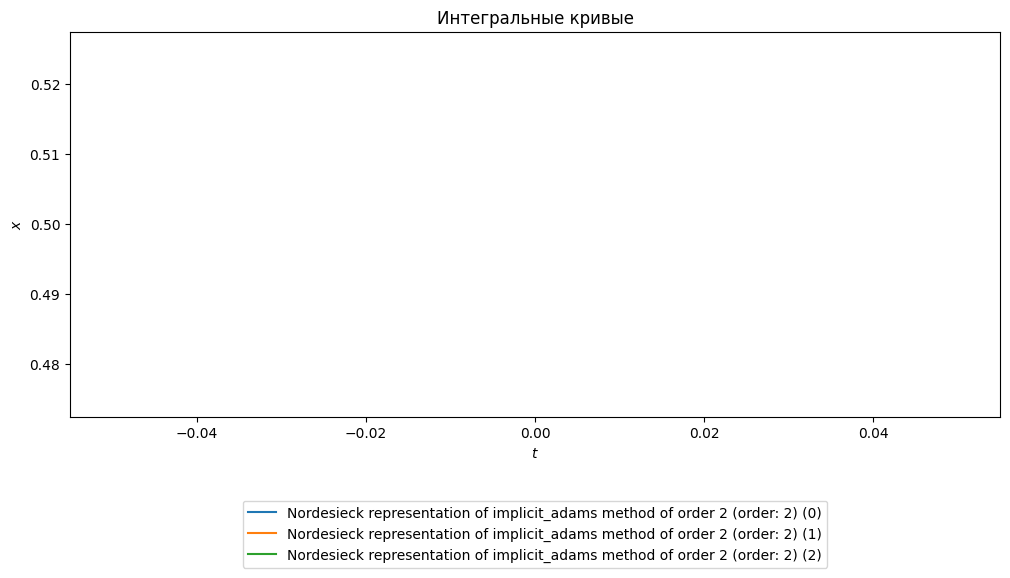

Nordesieck representation of implicit_adams method of order 3 3
Cannot solve system, got not a number value
Failed to solve at t = 0.01
[0]
[[0.5 0.5 0.5]]


/home/vlad/Documents/VSCode/MiptCompMath/solvers.py:43: RuntimeWarning: divide by zero encountered in scalar divide
  x[i] = v[i] / U[i][i]


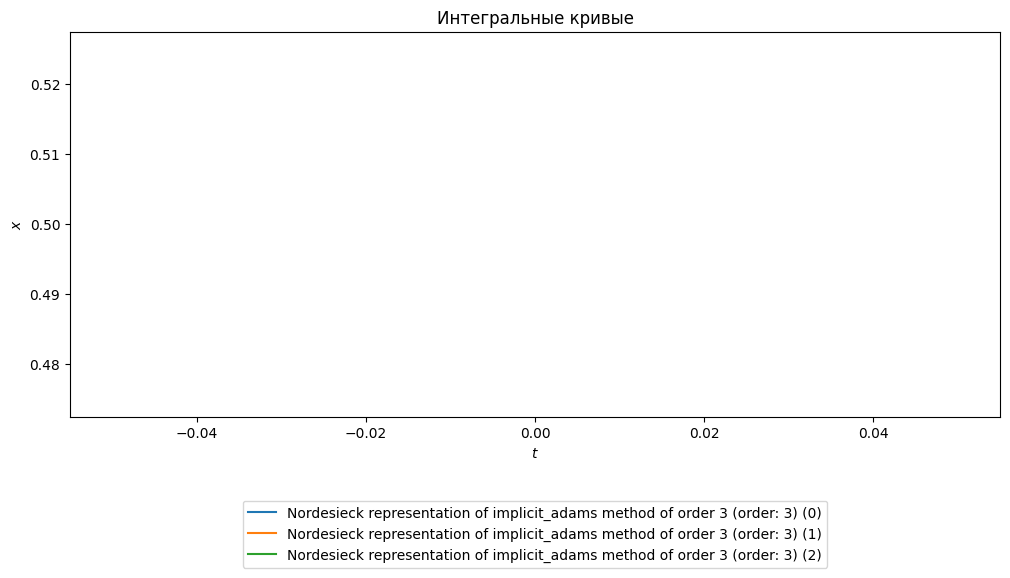

Nordesieck representation of implicit_adams method of order 4 4
Cannot solve system, got not a number value
Failed to solve at t = 0.01
[0]
[[0.5 0.5 0.5]]


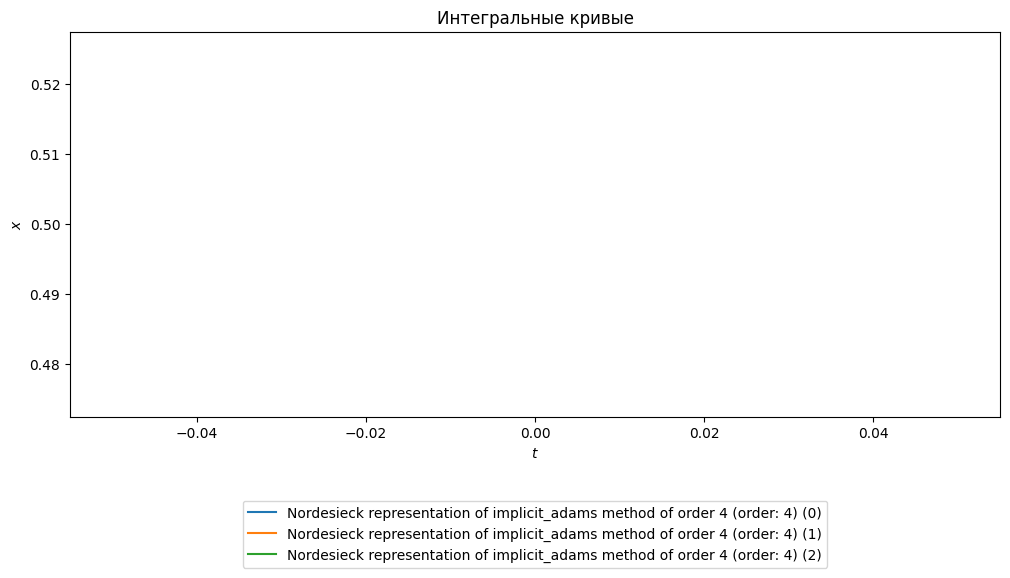

Nordesieck representation of implicit_adams method of order 5 5
Cannot solve system, got not a number value
Failed to solve at t = 0.01
[0]
[[0.5 0.5 0.5]]


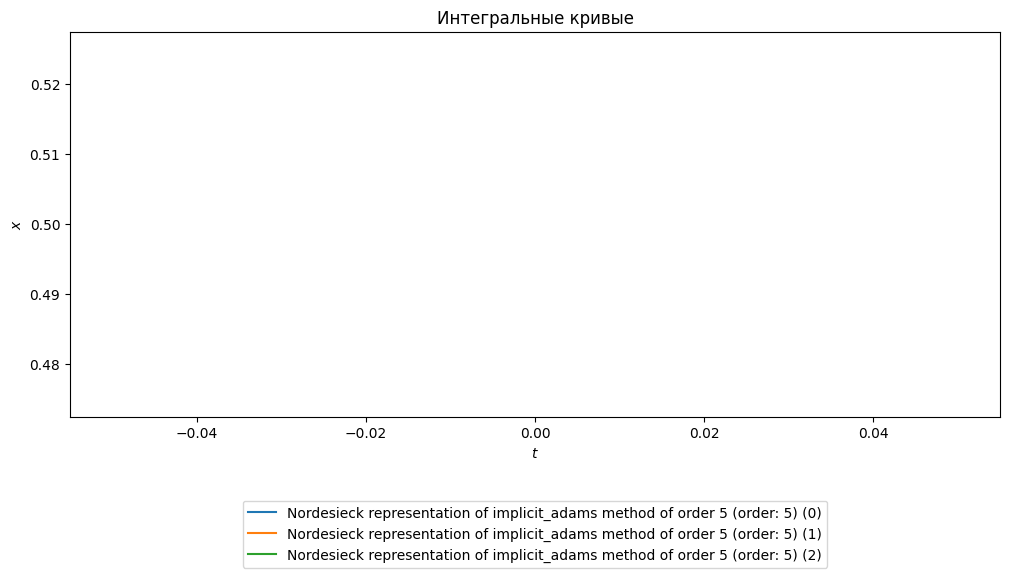

Nordesieck representation of implicit_adams method of order 6 6
Cannot solve system, got not a number value
Failed to solve at t = 0.01
[0]
[[0.5 0.5 0.5]]


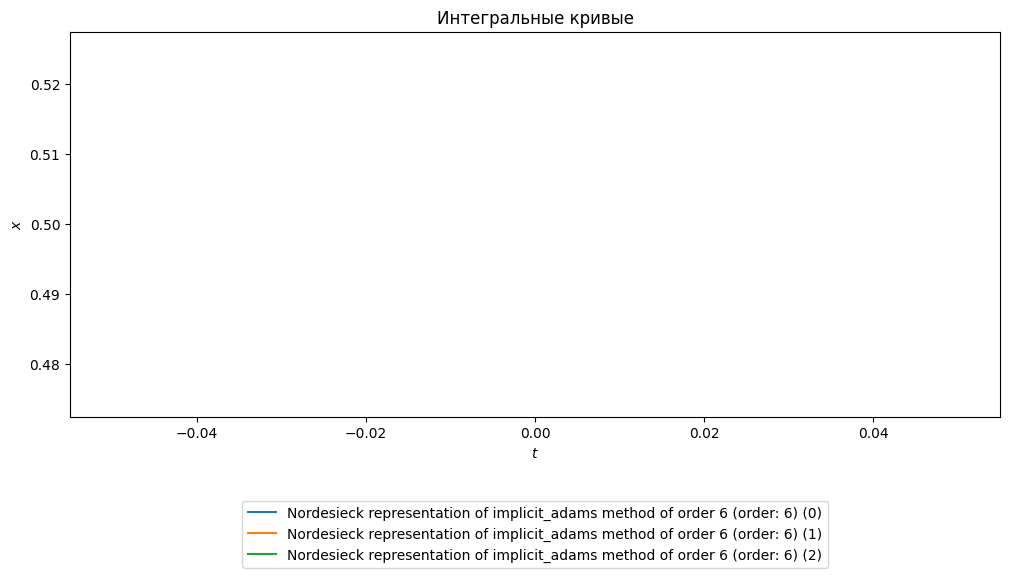

Nordesieck representation of implicit_backward_differentiation method of order 1 1


In [ ]:
tau = 0.01
# tau = 0.01
t_stop = 800

enabled = True

print_progress = True

methods: list[solvers.NordsieckMethod] = []

methods.append(
    solvers.NordsieckMethod(
        "implicit_adams",
        1,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_adams",
        2,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_adams",
        3,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_adams",
        4,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_adams",
        5,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_adams",
        6,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_backward_differentiation",
        1,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_backward_differentiation",
        1,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_backward_differentiation",
        2,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_backward_differentiation",
        3,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_backward_differentiation",
        4,
    )
)

methods.append(
    solvers.NordsieckMethod(
        "implicit_backward_differentiation",
        6,
    )
)

if enabled:
    for method in methods:
        tau = method.step or tau
        method = solvers.solve_nordsieck(f, t_start, t_stop, tau, x_0, method, print_progress=print_progress)
        print(method.solution.t)
        print(method.solution.x)
        if plot_single:
            plotters.plot_solutions([method], multidimensionals_solution=True)

    plotters.plot_solutions(methods, multidimensionals_solution=True)